## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training image processing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
   'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[119.75 109.75 136.75]
   [122.5  112.5  139.5 ]
   [123.   113.   140.  ]
   ...
   [165.75 160.75 183.75]
   [167.   162.   185.  ]
   [167.5  162.5  185.5 ]]

  [[121.75 111.75 138.75]
   [122.25 112.25 139.25]
   [121.5  111.5  138.5 ]
   ...
   [164.   159.   182.  ]
   [164.5  159.5  182.5 ]
   [164.5  159.5  182.5 ]]

  [[124.25 114.25 141.25]
   [119.   109.   136.  ]
   [120.75 110.75 137.75]
   ...
   [163.5  158.5  181.5 ]
   [163.   158.   181.  ]
   [163.   158.   181.  ]]

  ...

  [[135.   131.   156.  ]
   [139.25 135.25 160.25]
   [131.   127.   152.  ]
   ...
   [158.75 158.75 184.75]
   [158.75 158.75 184.75]
   [158.   158.   184.  ]]

  [[129.5  125.5  150.5 ]
   [130.75 126.75 151.75]
   [132.75 128.75 153.75]
   ...
   [159.75 159.75 185.75]
   [159.75 159.75 185.75]
   [160.75 160.75 186.75]]

  [[134.5  130.5  155.5 ]
   [131.25 127.25 152.25]
   [128.25 124.25 149.25]
   ...
   [156.5  156.5  182.5 ]
   [156.5  156.5  182.5 ]
   [158.5  158.5  18

## Building Models

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolutional Layers

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
## Output Layer
model.add(Dense(units=38,activation='softmax'))  # Adjusted for 21 classes


## Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Model training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 5588s 3s/step - loss: 1.3020 - accuracy: 0.6151 - val_loss: 0.4354 - val_accuracy: 0.8630
Epoch 2/10
2197/2197 [==============================] - 4953s 2s/step - loss: 0.4161 - accuracy: 0.8684 - val_loss: 0.2737 - val_accuracy: 0.9131
Epoch 3/10
2197/2197 [==============================] - 4718s 2s/step - loss: 0.2520 - accuracy: 0.9184 - val_loss: 0.2051 - val_accuracy: 0.9369
Epoch 4/10
2197/2197 [==============================] - 4683s 2s/step - loss: 0.1758 - accuracy: 0.9425 - val_loss: 0.1701 - val_accuracy: 0.9455
Epoch 5/10
2197/2197 [==============================] - 5180s 2s/step - loss: 0.1287 - accuracy: 0.9575 - val_loss: 0.1620 - val_accuracy: 0.9516
Epoch 6/10
2197/2197 [==============================] - 4635s 2s/step - loss: 0.1046 - accuracy: 0.9661 - val_loss: 0.1455 - val_accuracy: 0.9542
Epoch 7/10
2197/2197 [==============================] - 4631s 2s/step - loss: 0.0871 - accuracy: 0.9718 - val_loss: 0.1717 -

## Model evaluation

In [1]:
train_loss,train_acc = model.evaluate(training_set)

NameError: name 'model' is not defined

In [22]:
print(train_loss,train_acc)

0.029489874839782715 0.9900704026222229


In [23]:
# Model Salidation Set

In [24]:
val_loss,Val_acc = model.evaluate(validation_set)

550/550 [==============================] - 273s 497ms/step - loss: 0.1210 - accuracy: 0.9652


In [25]:
print(val_loss,Val_acc)

0.12097013741731644 0.9651718735694885


## Saving Model

In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'loss': [1.3019975423812866,
  0.41613319516181946,
  0.2519588768482208,
  0.17583373188972473,
  0.12870892882347107,
  0.10462085902690887,
  0.08705994486808777,
  0.07281240820884705,
  0.06506188958883286,
  0.05241990089416504],
 'accuracy': [0.6150935292243958,
  0.8683690428733826,
  0.9184010028839111,
  0.9425421357154846,
  0.9574649930000305,
  0.9661284685134888,
  0.9717760682106018,
  0.9762429594993591,
  0.979173481464386,
  0.9827725887298584],
 'val_loss': [0.4354036748409271,
  0.27367234230041504,
  0.20513544976711273,
  0.17014992237091064,
  0.16204576194286346,
  0.14550749957561493,
  0.17173413932323456,
  0.15100060403347015,
  0.12077633291482925,
  0.12097016721963882],
 'val_accuracy': [0.8630207180976868,
  0.9131003618240356,
  0.9368882179260254,
  0.9454814195632935,
  0.9515706896781921,
  0.954245388507843,
  0.947302520275116,
  0.954643726348877,
  0.9638060331344604,
  0.9651718735694885]}

In [28]:
##Recording history
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import json
model = load_model('C:\\Users\\PC\\Desktop\\mlearning\\backend\\notebooks\\trained_model.keras')

In [6]:
with open('C:\\Users\\PC\\Desktop\\mlearning\\backend\\notebooks\\training_hist.json', 'r') as f:
    training_history = json.load(f)

In [7]:
print(training_history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
epochs = range(1, len(training_history['accuracy']) + 1)

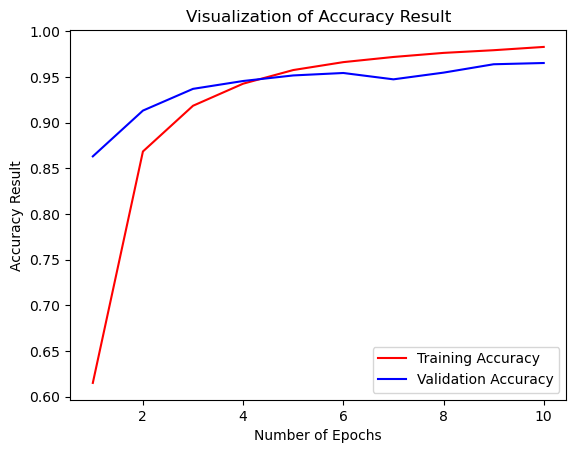

In [10]:
plt.plot(epochs, training_history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Accuracy Visualization

## Metrics for model evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [32]:
test_set =  tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 280s 507ms/step


(array([[1.0000000e+00, 3.6309787e-13, 1.2846268e-13, ..., 4.1913060e-18,
         5.7423852e-16, 1.4781909e-16],
        [1.0000000e+00, 1.4102981e-12, 2.6854569e-10, ..., 8.0568334e-16,
         2.1058559e-12, 2.3721681e-14],
        [1.0000000e+00, 6.6785919e-14, 2.5275704e-13, ..., 3.3275030e-20,
         1.7756402e-16, 5.0478997e-16],
        ...,
        [6.5448332e-14, 4.5402296e-15, 3.0950767e-14, ..., 2.7338804e-15,
         3.3445769e-15, 1.0000000e+00],
        [3.0632232e-17, 1.9435975e-20, 3.2163434e-19, ..., 2.0843486e-20,
         2.5804531e-20, 1.0000000e+00],
        [2.2566444e-19, 5.1144670e-21, 1.9334683e-18, ..., 7.8369491e-22,
         9.2614967e-20, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [34]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [35]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
import tensorflow as tf
import numpy as np

# Example definition of true_categories (replace this with your actual data)
true_categories = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Example one-hot encoded categories

Y_true = tf.argmax(true_categories, axis=1)
print(Y_true)



tf.Tensor([0 1 2], shape=(3,), dtype=int64)


In [39]:
## precision recall

In [41]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report

# Assuming true_categories is a one-hot encoded array
true_categories = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Example true categories
predicted_categories = np.array([0, 1, 2])  # Example predicted categories

# Convert one-hot to class indices
Y_true = tf.argmax(true_categories, axis=1).numpy()

# Print lengths to check
print("Length of Y_true:", len(Y_true))
print("Length of predicted_categories:", len(predicted_categories))

# Print the classification report
print(classification_report(Y_true, predicted_categories, target_names=["Class 0", "Class 1", "Class 2"]))



Length of Y_true: 3
Length of predicted_categories: 3
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       1.00      1.00      1.00         1
     Class 2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [42]:
cm =confusion_matrix(Y_true,predicted_categories)
cm

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int64)

### Confusion Matrix Visualization

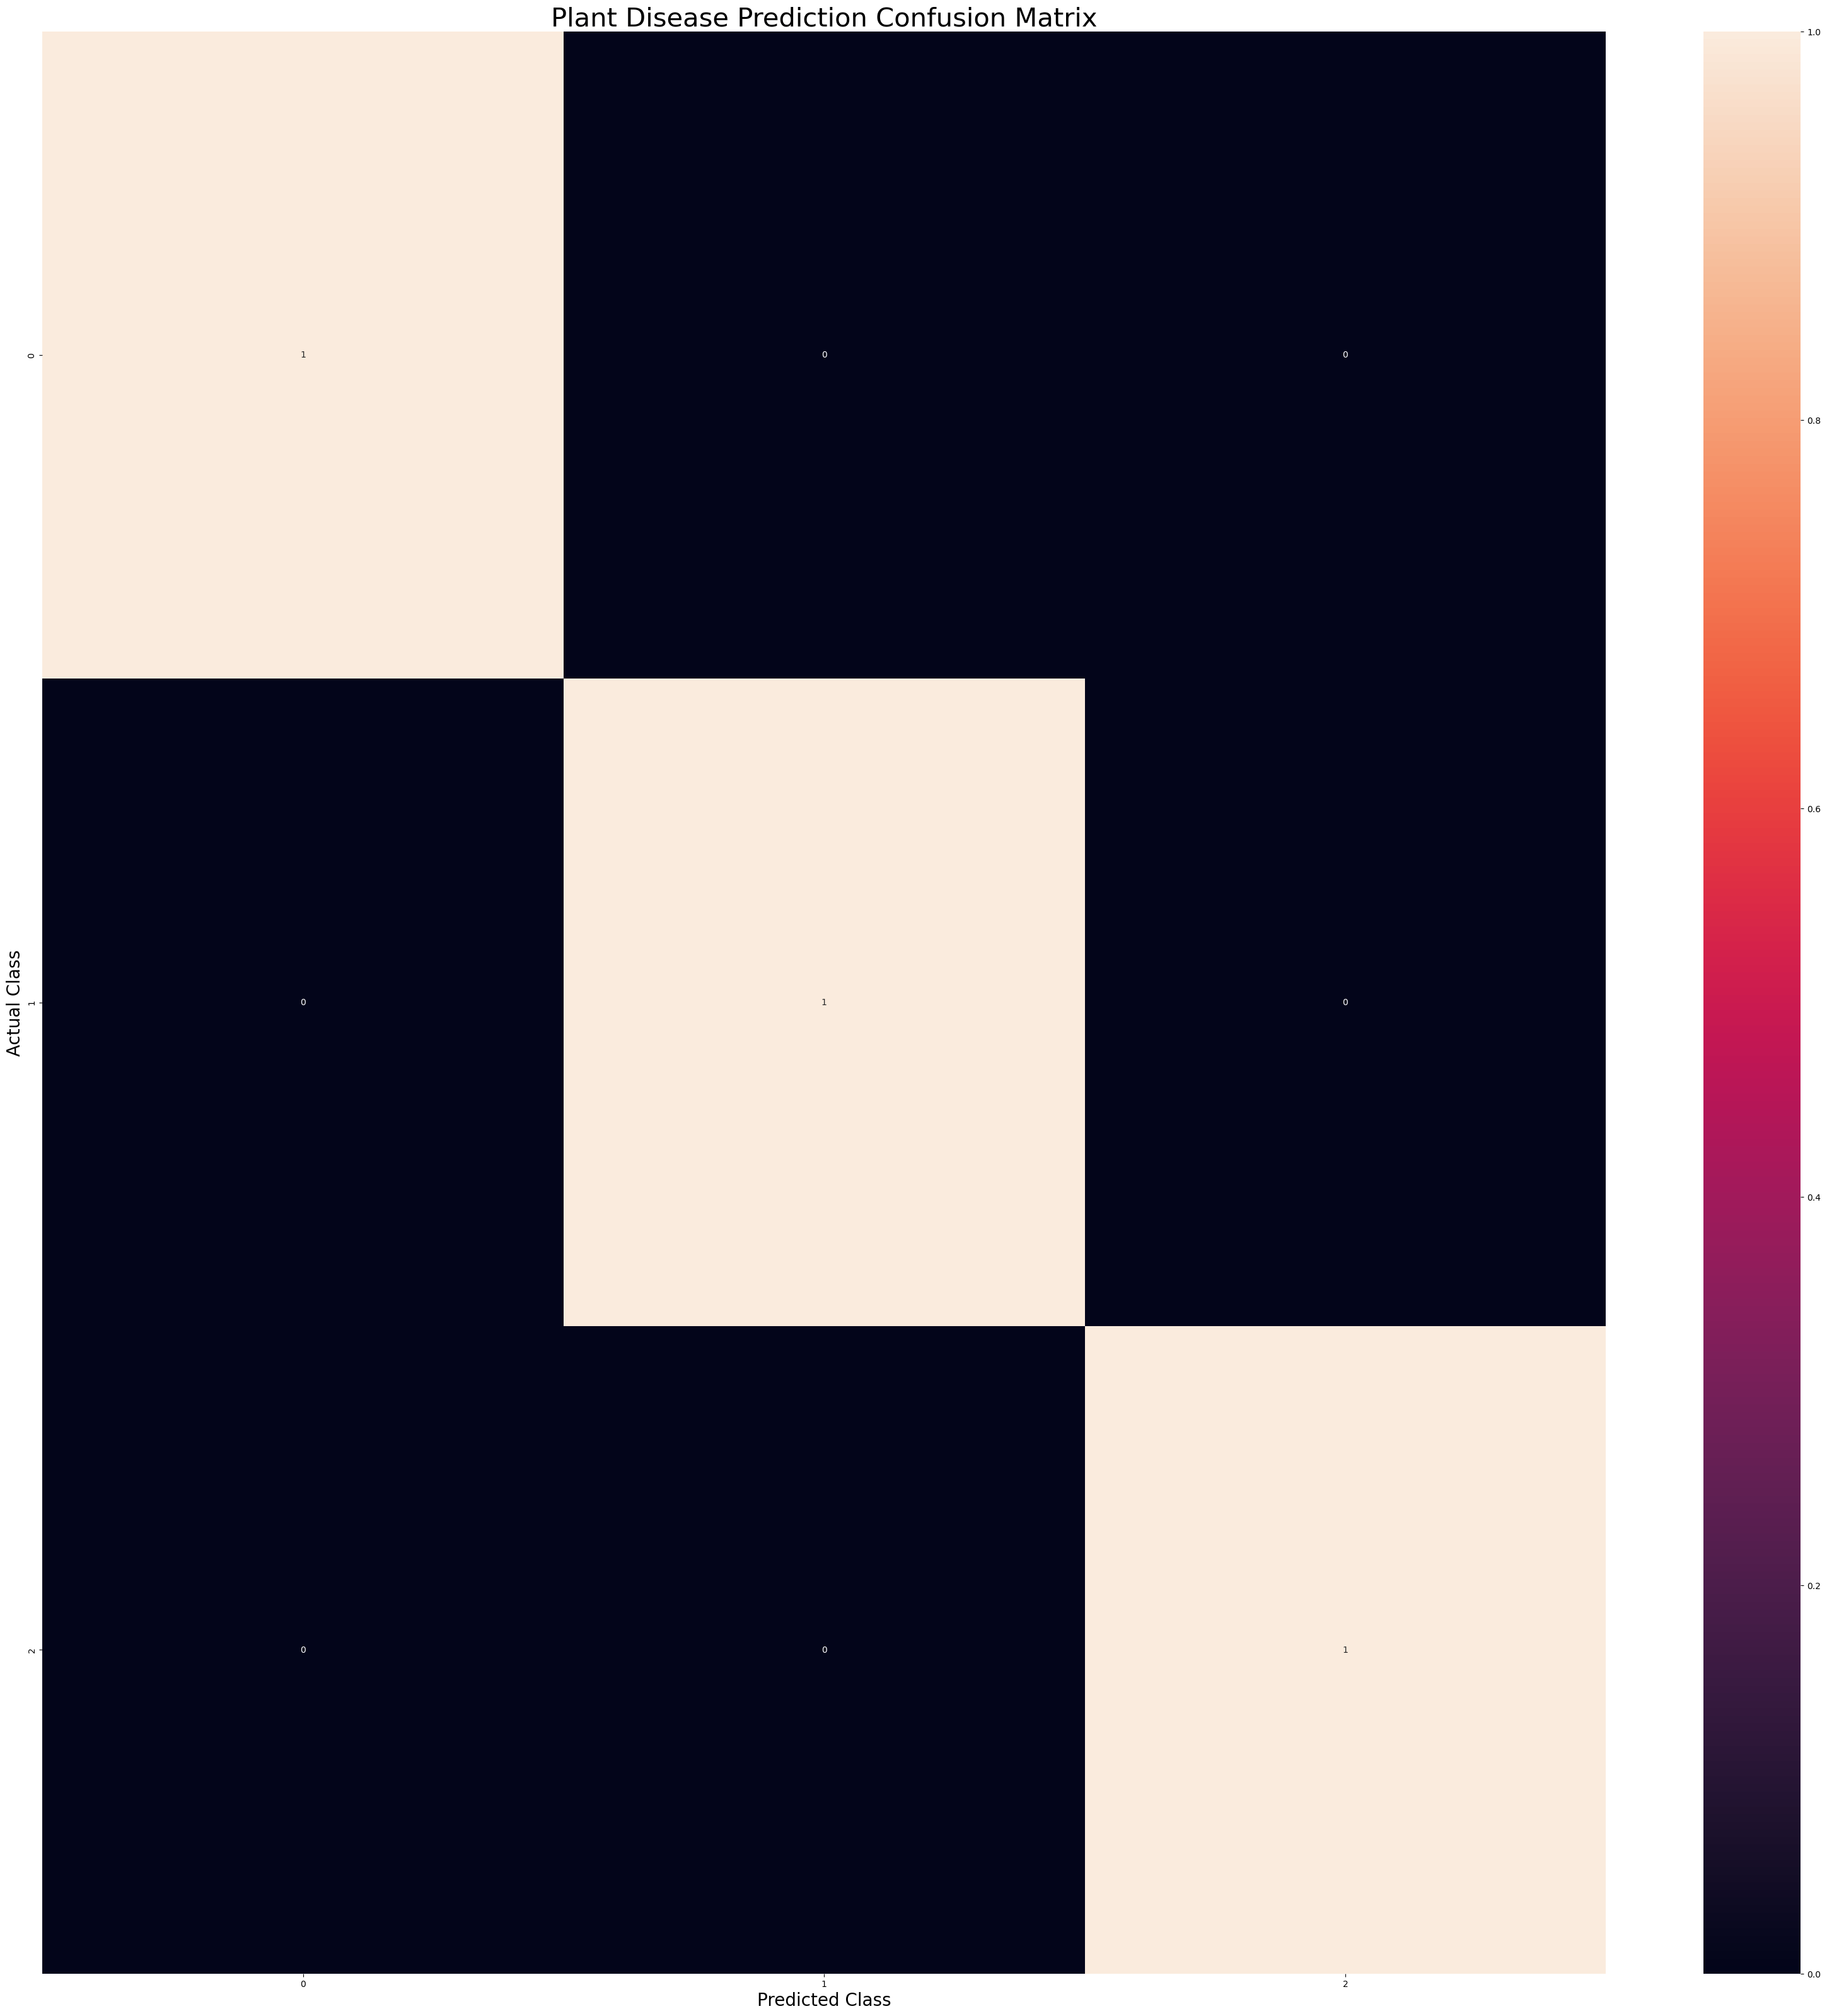

In [43]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()

In [2]:
y_true = [0, 1, 2, 1, 0]  # True labels
y_pred = [0, 0, 2, 1, 0]   # Predicted labels


In [3]:
import numpy as np

y_true = np.array([...])  # Replace with actual true labels
y_pred = np.array([...])  # Replace with actual predicted labels


In [4]:
print("True labels shape:", y_true.shape)
print("Predicted labels shape:", y_pred.shape)


True labels shape: (1,)
Predicted labels shape: (1,)


In [5]:
print("Unique true labels:", np.unique(y_true))
print("Unique predicted labels:", np.unique(y_pred))


Unique true labels: [Ellipsis]
Unique predicted labels: [Ellipsis]


In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Correctly initialized true and predicted labels
y_true = np.array([0, 1, 2, 1, 0])  # Example true labels
y_pred = np.array([0, 0, 2, 1, 0])  # Example predicted labels

# Print shapes and contents
print("y_true shape:", y_true.shape)
print("y_pred shape:", y_pred.shape)
print("y_true contents:", y_true)
print("y_pred contents:", y_pred)

# Ensure 1D arrays
if len(y_true.shape) > 1:
    y_true = y_true.flatten()
if len(y_pred.shape) > 1:
    y_pred = y_pred.flatten()

# Encode if they are strings (this example uses integers)
# (Skip encoding if your data is already numeric)

# Ensure types are consistent (if using numeric types)
y_true = y_true.astype(int)
y_pred = y_pred.astype(int)

# Compute confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


y_true shape: (5,)
y_pred shape: (5,)
y_true contents: [0 1 2 1 0]
y_pred contents: [0 0 2 1 0]
Confusion Matrix:
 [[2 0 0]
 [1 1 0]
 [0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.89      0.83      0.82         5
weighted avg       0.87      0.80      0.79         5



In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Data Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Model Training and Tuning
param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Step 3: Evaluation
y_pred = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


NameError: name 'X' is not defined